# K Means Clustering With Different Distance Metrics

# Importing Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances, manhattan_distances, cosine_distances

## Load Dataset

In [3]:
df = pd.read_csv('Z:\Machine-Learning-Lab\exp 5 K Means\iris.csv')
df.head()

# one hot encode the species column
df = pd.get_dummies(df, columns=['species'])

<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\guhan\AppData\Local\Temp\ipykernel_24556\3171452390.py:1: SyntaxWarning: invalid escape sequence '\M'
  df = pd.read_csv('Z:\Machine-Learning-Lab\exp 5 K Means\iris.csv')


## Feature Scaling

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop(columns=['species_setosa', 'species_versicolor', 'species_virginica']))

## KMeans Function

In [13]:
def kmeans_clustering(distance_measure):
    # Initialize KMeans object with 5 clusters (can be adjusted)
    kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)

    # Fit KMeans model
    kmeans.fit(df_scaled)

    # Compute cluster centers
    centroids = kmeans.cluster_centers_

    # Assign clusters
    labels = kmeans.labels_

    # Calculate cluster distances based on the specified distance measure
    if distance_measure == 'euclidean':
        distances = euclidean_distances(df_scaled, centroids)
    elif distance_measure == 'manhattan':
        distances = manhattan_distances(df_scaled, centroids)
    elif distance_measure == 'squared_euclidean':
        distances = euclidean_distances(df_scaled, centroids) ** 2
    elif distance_measure == 'cosine':
        distances = cosine_distances(df_scaled, centroids)
    else:
        raise ValueError("Invalid distance measure specified")

    # Plot histogram of distances
    plt.hist(distances.flatten(), bins=20)
    plt.title(f"Distance Histogram ({distance_measure})")
    plt.xlabel("Distance to Nearest Cluster Center")
    plt.ylabel("Frequency of Occurrence")
    plt.grid(True)
    plt.style.use('ggplot')
    plt.show()

    # Return distances for further analysis
    return distances.flatten()

## Driver Code

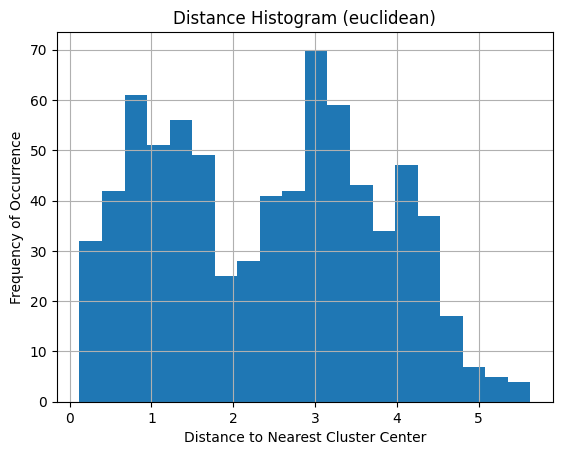

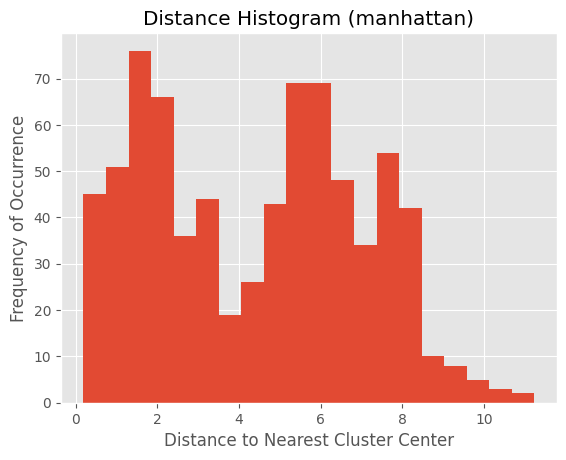

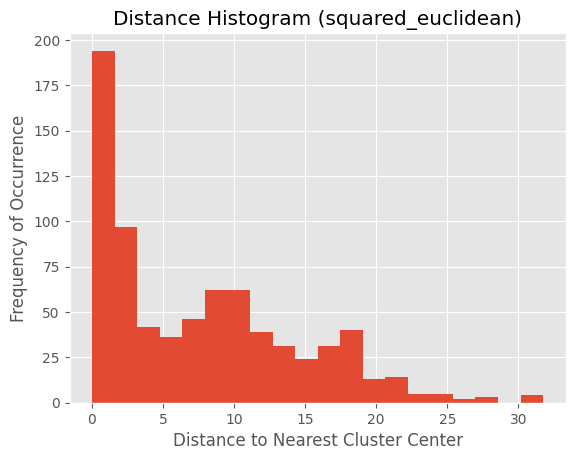

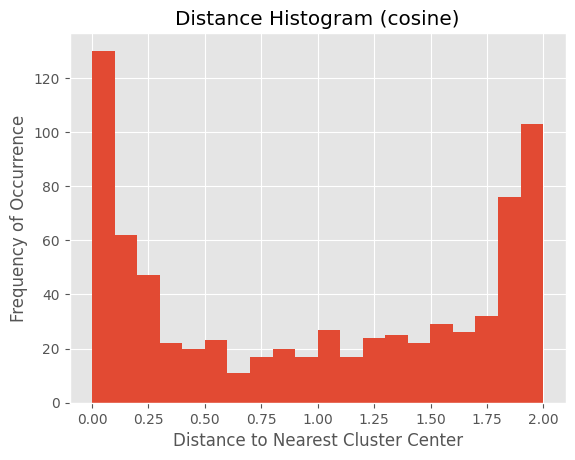

In [14]:
euclidean_dist = kmeans_clustering('euclidean')  # Rename variable to avoid conflict
manhattan_dist = kmeans_clustering('manhattan')  # Rename variable to avoid conflict
squared_euclidean_dist = kmeans_clustering('squared_euclidean')  # Rename variable to avoid conflict
cosine_dist = kmeans_clustering('cosine')  # Rename variable to avoid conflict